## Deep Learning: Build a Traffic Sign Recognition Classifier


### Dataset

1. [Download the dataset](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip). This is a pickled dataset in which we've already resized the images to 32x32.



## Step 0: Load The Data

In [1]:
#!git clone https://github.com/aruizga7/Self-Driving-Car-in-DSX.git

In [2]:
%cd /gpfs/global_fs01/sym_shared/YPProdSpark/user/s84a-b0b45068a9ec87-f90433abd686/notebook/work/

/gpfs/global_fs01/sym_shared/YPProdSpark/user/s84a-b0b45068a9ec87-f90433abd686/notebook/work


In [3]:
!ls

checkpoint		   lenet.meta		    train.p
core.42896		   Self-Driving-Car-in-DSX  valid.p
lenet.data-00000-of-00001  test.p
lenet.index		   traffic-signs-data.zip


In [4]:
# Load pickled data
import pickle


training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:

# Number of training examples
n_train =  len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape =X_train[0].shape

# How many unique classes/labels there are in the dataset.
alltotal = set(y_train )
n_classes = len(alltotal )

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

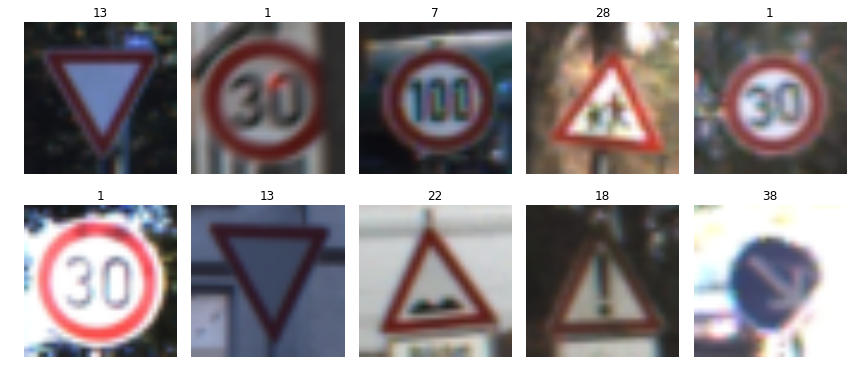

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

Here is an exploratory visualization of the data set. It is a bar chart showing the frequency distribution of traffic sign respect to the classes

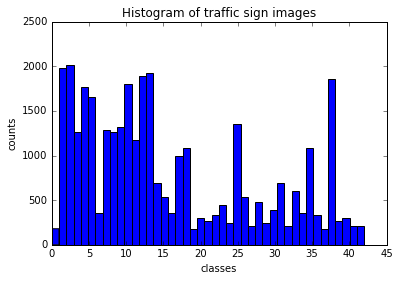

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, n_classes)
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of traffic sign images')
#p1 = ax.bar(ind,0,width,color='r',bottom=0,yerr=0)
plt.show()

I used the python library to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of test set is 12630
* The shape of a traffic sign image is (32, 32, 3)
* The number of unique classes/labels in the data set is 43

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(34799, 32, 32, 3)
(34799, 32, 32)
(12630, 32, 32, 3)
(12630, 32, 32)
(4410, 32, 32, 3)
(4410, 32, 32)


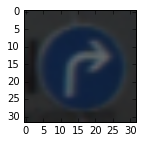

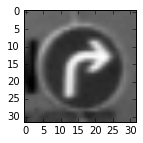

In [8]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from skimage.color import rgb2gray
import numpy as np

def rotate(image, angle):
    
    # grab the dimensions of the image and calculate the center
    # of the image
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    # rotate the image by 180 degrees
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def normalize(img):
    return cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#def normalize(img):
#    return ((img - np.min(img)) * 255.) / ( np.max(img) - np.min(img)) 

def grayscale(img):
    #COLOR_BGR2GRAY COLOR_RGB2GRAY
    return rgb2gray(img)
    #return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  

def setgrayscale(images):
    #from rgb to gray
    print(images.shape)
    result = np.zeros(shape=(len(images),32,32))
    for i in range(len(images)): 
        #gray = np.resize(grayscale(images[i]), (32, 32, 1))
        gray_img = grayscale(images[i])
        img_normalized = normalize(gray_img)
        result[i] = gray_img
    print(result.shape)
    return result

#for i in range(1000):
    #print(i)
#    np.append(X_train,(rotate(X_train[i],90)))

X_traingray = setgrayscale(X_train)
X_testgray = setgrayscale(X_test)
X_validationgray = setgrayscale(X_valid)

index = random.randint(0, len(X_traingray))

image = X_train[index]
plt.figure(figsize=(2,2))
plt.imshow(image)

image = X_traingray[index]
plt.figure(figsize=(2,2))
plt.imshow(image,cmap="Greys_r")


I decided to convert the images to grayscale because the classifier perform better working with only one parameter. As a last step, I normalized the image data because to avoid gradient oscillatin due to the different distributions due of features value.



The data is divided into training set and validation set, which is generated by train_test_split function of sklearn, where the training set is 80% and the verification set is 20%.
To cross validate my model, I randomly split the training data into training set and validation set. I did this by using train_test_split function that split the input sets in random subsets with size 80/20 of the input.

My final training set had 27839 number of images. My validation set and test set had 6960 and 12630 number of images.



In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

X_traingray, X_validationgray, y_train, y_validation = train_test_split(X_traingray, y_train, test_size=0.2, random_state=0)
#print("Updated Image Shape: {}".format(X_train[0].shape))  

X_traingray, y_train = shuffle(X_traingray, y_train)

print(X_traingray.shape)
print(X_validationgray.shape)
print(y_train.shape)
print(y_validation.shape)


from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

# tf Graph input
x = tf.placeholder(tf.float32,(None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
one_hot_y = tf.one_hot(y,43)

(27839, 32, 32)
(6960, 32, 32)
(27839,)
(6960,)


In [10]:



def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.075
    
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 32, 32, 1])
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)

    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #  Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Apply Dropout
    #fc2 = tf.nn.dropout(fc2, keep_prob) # Apply Dropout

    #  Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
 
    return logits



For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


My final architecture is single CNN with four hidden layers. 
A CNN consists of a succession of convolutional and maxpooling layers, and each layer only receives connections from its previous layer. The last layer is a fully connected layer with one ouput unit per class in the recognition task.

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 grayscale image   					| 
| Convolution 5x5     	| 1x1 stride, same padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride, outputs 14x14x6  				    |
| Convolution 5x5	    | 1x1 strinde, outputs 10x10x16        		    |
| Max pooling	      	| 2x2 stride, outputs 5x5x16  				    |
| Flatten               | outputs 400                                   |
| Fully connected		| output = 120     								|
| RELU					|												|
| Fully connected		| output = 84     								|
| RELU					|												|
| Fully connected		| output = 43     								|
  
  


In [11]:
### Feel free to use as many code cells as needed.
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
rate = 0.01

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [12]:
### Once a final model architecture is selected, 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_traingray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_traingray, y_train = shuffle(X_traingray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_traingray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
            
        validation_accuracy = evaluate(X_validationgray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        training_accuracy = evaluate(X_traingray, y_train)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
### the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_testgray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    training_accuracy = evaluate(X_traingray, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Validation Accuracy = 0.698
Training Accuracy = 0.709

EPOCH 2 ...
Validation Accuracy = 0.838
Training Accuracy = 0.858

EPOCH 3 ...
Validation Accuracy = 0.907
Training Accuracy = 0.923

EPOCH 4 ...
Validation Accuracy = 0.923
Training Accuracy = 0.936

EPOCH 5 ...
Validation Accuracy = 0.933
Training Accuracy = 0.950

EPOCH 6 ...
Validation Accuracy = 0.929
Training Accuracy = 0.947

EPOCH 7 ...
Validation Accuracy = 0.931
Training Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.938
Training Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.946
Training Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.942
Training Accuracy = 0.964

EPOCH 11 ...
Validation Accuracy = 0.945
Training Accuracy = 0.969

EPOCH 12 ...
Validation Accuracy = 0.945
Training Accuracy = 0.967

EPOCH 13 ...
Validation Accuracy = 0.945
Training Accuracy = 0.967

EPOCH 14 ...
Validation Accuracy = 0.951
Training Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.945
Tra

To train the model, I used 15 epochs at the beginning of each epoch I shuffle the data in order to avoid the biases due to the position of the images.
I inizialize the variable of tensorflow, and I break training data into batches and train the model on each batch. At the end of each epoch I evaluate the model on our validation data.

The optimizer in order to minimize the loss function is a stochastic gradient descend (SGD) algorithm called Adam, that estimate the loss over small subset of data (batches).
I used a batch size of 128 images for a total of 218 iteraction to complete an epoch.

The value of hiperparameter learning rate that I use is 0.01. 





I modeled the lenet-5 architecture, used convolutional neural networks to train models, used validation in training overshoots to verify the accuracy of training results, used one-hot coding in training, and cross entropy as loss function.

My final model results were:
* training set accuracy of 0.972
* validation set accuracy of 0.953
* test set accuracy of 0.880

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?

The architecture that I choise for resolve the problem of image classification is the LeNet  architecture a Convolutional Neural Network. There were some problems in tuning of the parameters and in the configuration of input and output dimensions of each layear. The activation fuction used is ReLu function. I tried to add a dropout layer in order to avoid overfitting. I tuned the mu = 0 and sigma = 0.1. I adapted the shape of weight and bias vector in each layer. I reshape the input image to make dimensionally consisten with weight matrix. I set the final filter depth to 43. I try different learning rate and I found that 0.01 work well.

The final accurancy of the test set is 89%. In order to estimate how well the model has been trained I look to the validation accurancy and in the 15 epochs is 95%. The training accurancy is comparable with the validation accurancy and at is 97%
 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [13]:
%cd Self-Driving-Car-in-DSX
!ls

/gpfs/global_fs01/sym_shared/YPProdSpark/user/s84a-b0b45068a9ec87-f90433abd686/notebook/work/Self-Driving-Car-in-DSX
1. Line Lane Detection		 4. Vehicle detection
2. Advanced Line Lane Detection  5. Behavioral cloning
3. Traffic Sign Recognition	 README.md


In [14]:
%cd 3. Traffic Sign Recognition
!ls

/gpfs/global_fs01/sym_shared/YPProdSpark/user/s84a-b0b45068a9ec87-f90433abd686/notebook/work/Self-Driving-Car-in-DSX/3. Traffic Sign Recognition
README.md  Self-Driving-Car-in-DSX


In [15]:
%cd Self-Driving-Car-in-DSX
!ls

/gpfs/global_fs01/sym_shared/YPProdSpark/user/s84a-b0b45068a9ec87-f90433abd686/notebook/work/Self-Driving-Car-in-DSX/3. Traffic Sign Recognition/Self-Driving-Car-in-DSX
1. Line Lane Detection		 4. Vehicle detection
2. Advanced Line Lane Detection  5. Behavioral cloning
3. Traffic Sign Recognition	 README.md


In [16]:
%cd 3. Traffic Sign Recognition
!ls

/gpfs/global_fs01/sym_shared/YPProdSpark/user/s84a-b0b45068a9ec87-f90433abd686/notebook/work/Self-Driving-Car-in-DSX/3. Traffic Sign Recognition/Self-Driving-Car-in-DSX/3. Traffic Sign Recognition
checkpoint	 images				 README.md
core.19155	 model.ckpt.data-00000-of-00001  signnames.csv
environment.yml  model.ckpt.index		 Traffic_Sign_Classifier.ipynb
image		 model.ckpt.meta


./image/image1.jpeg
./image/image2.jpeg
./image/image3.jpeg
./image/image4.jpeg
./image/image5.jpeg


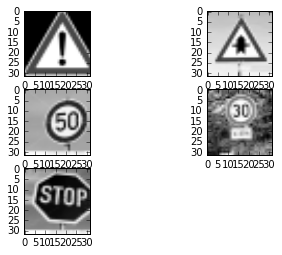

In [17]:
### Load the images and plot them here.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


def loadImage(path):
    print(path)
    image = mpimg.imread(path)
    image = grayscale(image)
    image = normalize(image)
    minimun = np.minimum(image.shape[0], image.shape[1])
    cropped = image[0:minimun, 0:minimun]
    image = cv2.resize(cropped, (32,32), interpolation = cv2.INTER_AREA)
    return image

# Load an color image in grayscale
def loadImages(num):
    result = []
    f = plt.figure()
    for i in range(1,num+1):
        image = loadImage('./image/image' + str(i) + '.jpeg')
        f.add_subplot(3, 2, i) 
        plt.imshow(image,cmap="Greys_r")  
        result.append(image)
    return result
    
#[loadImage('./image/image1.jpeg'),loadImage('./image/image2.jpeg')]
X_data=np.array(loadImages(5))
y_labels=np.array([18,11,2,1,14])

In [ ]:
softmax = tf.nn.softmax(logits)
pred = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
    result = sess.run(pred, feed_dict={x: X_data, keep_prob: .8})
    webaccuracy = evaluate(X_data, y_labels)

    predicted_logits = sess.run(logits, feed_dict={x:X_data, keep_prob:1})
    predicted_labels = np.argmax(predicted_logits, axis=1)
   
    predicted_labels= result.indices
    predictions  = result.values

Here are the results of the prediction:

| Image			                        |     Prediction	        					| 
|:-------------------------------------:|:---------------------------------------------:| 
| General caution    		            | Bicycles crossing  	                        | 
| Right-of-way at the next intersection | Right-of-way at the next intersection			|
| Speed limit (50km/h)				    | Speed limit (30km/h)      				    |
| Speed limit (30km/h)	      	        | Road work				                        |
| Stop		                            | Stop                	            	        |


The model was able to correctly guess 1 of the 5 traffic signs, which gives an accuracy of 20%. 
The last three images are a bit distorted during the automatic process of resizing and cropping.